In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [441]:
def carga_csv(file_name):
    """carga el fichero csv especificado y lo
 devuelve en un array de numpy
    """
    valores = pd.read_csv(file_name, header=None).values
    # suponemos que siempre trabajaremos con float
    return valores.astype(float)

In [442]:
datos = carga_csv('ex1data1.csv')

In [443]:
X = datos[:, :-1]
np.shape(X)         # (97, 1)

Y = datos[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

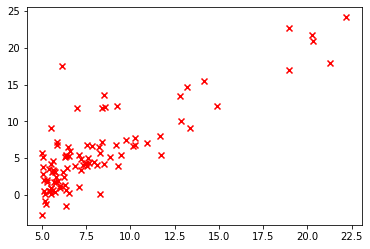

In [444]:
plt.scatter(X[:,-1], Y, c='r', marker='x')

In [445]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

def descenso_gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta

4.484480696802275
[-3.60858011  1.16418121]


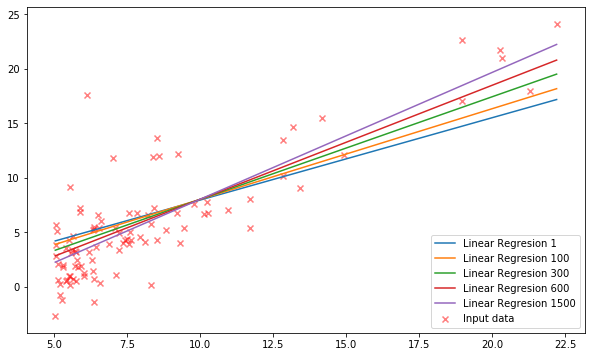

In [502]:
Theta = np.array([np.random.random(),np.random.random()])
alpha = 0.01
x = np.linspace(min(X[:,-1]), max(X[:,-1]))
y = Theta[0] + Theta[1]*x

plt.figure(figsize=(10,6))
mostrar = [1,100,300,600,1500]

for i in range(1500):
    Theta = descenso_gradiente(X, Y, Theta, alpha)
    x = np.linspace(min(X[:,-1]), max(X[:,-1]))
    y = Theta[0] + Theta[1]*x
    costes = coste(X, Y, Theta)
    if i+1 in mostrar:
        plt.plot(x,y, label="Linear Regresion {}".format(i+1))
        
print(costes)
print(Theta)

plt.scatter(X[:,-1],Y, c='r', marker='x',alpha=0.5,label="Input data")
plt.legend()
plt.savefig("LinearRegresion1.pdf")
plt.show()